# Lab4.2 Analysing the data for emotion classification

Copyright: Vrije Universiteit Amsterdam, Faculty of Humanities, CLTL

Before training and testing a classifier, it is good practice to analyse the data. Knowing the data is knowing about the problem that you are trying to solve!

You can analyse the data in various ways:

1. linguistic analysis: the length of the utterances, the diversiy of words used, the syntactic structures used
2. pragmatic analysis: the dialogue acts used such as question, statement, opinion, yes/no answer, appreciation, complaints
3. the distribution of the classification labels over the data

First of all, we need to know whether the train and test data have the right properties, i.e. is the test set representative for the problem that we want to solve and is the training data a good data set to learn how to tackle this problem.

Secondly, we may learn about what words and phrases may be important to detect the categories of our interest, in this case emotions. Setting the parameters of the classifier such as the minimal and maximal frequency threshold, the stopwords filtered but also whether using TD.IDF weighing makes sense all depend on the kind of words, their frequency and their distribution in the data.

Finally, the label distribution in the data tells us how much training data there is for each category. Some categories may be too dominant and others may be underrepresented. Obtaining sufficient data for all categories is often a challenge.

In the next sections, we will first analyse the vocabularies of the train and test data and after that the label distribution.


## 1. Loading the train and test data

We will load the data from the train and test file in Pandas to analyse the data distribution. We ignore here the development set but you can apply the same analyse to that set as well.
We load the data from the  ```Lab3.text_meaning/data/MELD``` folder:

* test_sent_emo.csv
* train_sent_emo.csv

In [2]:
import pandas as pd

In [3]:
filepath = '../Lab3.text_meaning/data/MELD/train_sent_emo.csv'
# Create a dataframe object 'dftrain' by readig the file.
dftrain = pd.read_csv(filepath)
filepath = '../Lab3.text_meaning/data/MELD/test_sent_emo.csv'
# Create a dataframe object 'dtest' by readig the file.
dftest = pd.read_csv(filepath)

In [4]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9989 entries, 0 to 9988
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sr No.        9989 non-null   int64 
 1   Utterance     9989 non-null   object
 2   Speaker       9989 non-null   object
 3   Emotion       9989 non-null   object
 4   Sentiment     9989 non-null   object
 5   Dialogue_ID   9989 non-null   int64 
 6   Utterance_ID  9989 non-null   int64 
 7   Season        9989 non-null   int64 
 8   Episode       9989 non-null   int64 
 9   StartTime     9989 non-null   object
 10  EndTime       9989 non-null   object
dtypes: int64(5), object(6)
memory usage: 858.6+ KB


In [5]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2610 entries, 0 to 2609
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sr No.        2610 non-null   int64 
 1   Utterance     2610 non-null   object
 2   Speaker       2610 non-null   object
 3   Emotion       2610 non-null   object
 4   Sentiment     2610 non-null   object
 5   Dialogue_ID   2610 non-null   int64 
 6   Utterance_ID  2610 non-null   int64 
 7   Season        2610 non-null   int64 
 8   Episode       2610 non-null   int64 
 9   StartTime     2610 non-null   object
 10  EndTime       2610 non-null   object
dtypes: int64(5), object(6)
memory usage: 224.4+ KB


The MELD data has 9989 entries as train data and 2610 entries as test data. In the next section, we will analys how the emotion labels are distributed over the data.

## 1. Analysing the vocabulary

The simplest way to analyse the vocabulary is to get all the tokens from the utterances and make a dictionary to count the freuqency of each token. From this we can learn:

1. How many tokens there are in the data and how many unique tokens (so-called types) there are;
2. What is the type/token ratio? A high ratio means a more diverse vocabulary (more words used relatively less frequently) and therefore more variation;
3. What are the most frequently used words and which words only occur once;

The next code extracts this information for both the training and test data. Take your time to read the code so that you understand it.

In [15]:
from nltk import word_tokenize

#### Analysing the training vocabulary
train_token_distribution = {}  ## dictionary to store frequency counts for tokens
train_token_count = 0  ## counter to get the total number of token occurrences

### Get the utterances from the train dataframe
train_utterances = dftrain['Utterance']

### Tokenize each utterance with NLTK and add the counts to the dictionary
for utterance in train_utterances:
    tokens = word_tokenize(utterance)
    #### Add the number of tokens to the total
    train_token_count += len(tokens)
    for token in tokens:
        if token in train_token_distribution:
            train_token_distribution[token]+=1
        else:
            train_token_distribution[token]=1

print('Total number of types in training set:', len(train_token_distribution))
print('Total number of tokens in training set:', train_token_count)
print('Type/Token ratio train:', round(len(train_token_distribution)/train_token_count, 2))

Total number of types in training set: 6588
Total number of tokens in training set: 106878
Type/Token ratio train: 0.06


We now derived a dictionary with the train_token_distribution and we obtained the total number of tokens (word occurrences), which is 106,878 tokens, and the  total number of Types, which is 6,588 unique tokens. The ratio is 0.06.

We now do the same for the test data:

In [16]:
#### Analysing the test vocabulary
test_token_distribution = {}
test_token_count = 0

### Get the utterances from the test dataframe
test_utterances = dftest['Utterance']

### Tokenize each utterance with NLTK and add the counts to the dictionary
for utterance in test_utterances:
    tokens = word_tokenize(utterance)
    #### Add the number of tokens to the total
    test_token_count += len(tokens)
    for token in tokens:
        if token in test_token_distribution:
            test_token_distribution[token]+=1
        else:
            test_token_distribution[token]=1

print('Total number of types in test set:', len(test_token_distribution))
print('Total number of tokens in test set:', test_token_count)
print('Type/Token ratio test:', round(len(test_token_distribution)/test_token_count,2))

Total number of types in test set: 2890
Total number of tokens in test set: 28754
Type/Token ratio test: 0.1


Obviously, the number of tokens and types are lower but the ratio is higher. This means there is  more variation in the use of words in the test set compared to the train data.

This becomes also clear when we compare the ratio of utterences, tokens and types across the training and test set.

In [17]:
print('Ratio Test/Train utterances', round(len(test_utterances)/len(train_utterances), 2))
print('Ratio Test/Train tokens', round(test_token_count/train_token_count, 2))
print('Ratio Test/Train types', round(len(test_token_distribution)/len(train_token_distribution), 2))

Ratio Test/Train utterances 0.26
Ratio Test/Train tokens 0.27
Ratio Test/Train types 0.44


The Type ratio is almost twice the token and utterance ratios.

By sorting the token distribution dictionaries by their frequency, we can inspect the most frequent tokens in each data set. For this, we use a bit more advanced Python code using a so-called ```lambda``` function, which is a function without a name that carries out a number of actions to some data set, in our case the distribution dictionary. Beginners can ignore this function for now. It is sufficient to know that it derives a new dictionary that is sorted by frequency, from most frequent to lowest frequency.

In [18]:
### Derive a new dictionary sorted by count
sorted_by_count = sorted(train_token_distribution.items(), key=lambda x: x[1], reverse=True)

# now loop through the sorted_by_count dictionary and get the top 50
top_train = []
for index, token in enumerate(sorted_by_count):
    if index >50:
        break
    top_train.append(token)
    
### Derive a new dictionary sorted by count
sorted_by_count = sorted(test_token_distribution.items(), key=lambda x: x[1], reverse=True)
                              
# now loop through the sorted_by_count dictionary and get the top 50
top_test = []
for index, token in enumerate(sorted_by_count):
    if index >50:
        break
    top_test.append(token)

### The next code pairs the top 50 lists for both using the zip function so that we can print these side-by-side
print()
print('Top 50 tokens for train and test respectively:')
for train, test in zip(top_train, top_test):
    print(train, test)


Top 50 tokens for train and test respectively:
(',', 7237) (',', 2037)
('.', 6478) ('.', 1698)
('!', 4266) ('I', 1149)
('I', 4143) ('!', 1090)
('you', 2908) ('you', 813)
('?', 2887) ('?', 769)
("'s", 1796) ("'s", 486)
('the', 1742) ('the', 446)
('to', 1619) ('to', 430)
('a', 1525) ('a', 378)
('it', 1310) ('it', 377)
("n't", 1169) ("n't", 356)
('that', 1131) ('that', 336)
('Oh', 1016) ('do', 289)
('do', 967) ('Oh', 275)
('and', 940) ('and', 252)
("'m", 825) ('is', 220)
('is', 735) ("'m", 213)
('me', 734) ('me', 194)
('of', 641) ('have', 175)
('this', 620) ('my', 171)
('just', 618) ('just', 168)
('in', 617) ('of', 164)
('have', 603) ('this', 162)
('my', 602) ('in', 159)
('You', 585) ('Yeah', 157)
('we', 577) ('on', 153)
("'re", 564) ('not', 145)
('Yeah', 510) ('You', 144)
('Okay', 502) ('with', 139)
('was', 501) ('we', 138)
('know', 501) ("'re", 136)
('on', 493) ('What', 135)
('na', 482) ('what', 133)
('what', 480) ('Okay', 130)
('No', 472) ('was', 127)
('for', 469) ('right', 125)
('not

When we look at the top 50 words, we can see that these are very similar despite the difference in the use of words. Although not identical, more or less the same tokens occur in both list. You can eyeball the list to see how much they overlap but we can also use some Python code to do this for us.

In the next code, we take a token from the most frequent words in the training data (top_train) and check if it is in the most frequent words of the test data (top_test). If so, we print the word with the frequencies in train and test respectively, followed by their ratio. We also keep a list of words that are unique in the top list of train. After this we do the same the other way around for the most frequent test words.

In [19]:
only_train = []
for token1 in top_train:
    match = False
    for token2 in top_test:
        if token1[0]==token2[0]:
            ### We print the matching word with the counts and the proportion of the test and train frequency
            print(token1[0], token1[1], token2[1], round(token2[1]/token1[1], 2) )
            match = True
    if not match:
        only_train.append(token1)

print("Only train", only_train)

only_test=[]
for token1 in top_test:
    match = False
    for token2 in top_train:
        if token1[0]==token2[0]:
            match = True
    if not match:
        only_test.append(token1)
print("Only test", only_test)

, 7237 2037 0.28
. 6478 1698 0.26
! 4266 1090 0.26
I 4143 1149 0.28
you 2908 813 0.28
? 2887 769 0.27
's 1796 486 0.27
the 1742 446 0.26
to 1619 430 0.27
a 1525 378 0.25
it 1310 377 0.29
n't 1169 356 0.3
that 1131 336 0.3
Oh 1016 275 0.27
do 967 289 0.3
and 940 252 0.27
'm 825 213 0.26
is 735 220 0.3
me 734 194 0.26
of 641 164 0.26
this 620 162 0.26
just 618 168 0.27
in 617 159 0.26
have 603 175 0.29
my 602 171 0.28
You 585 144 0.25
we 577 138 0.24
're 564 136 0.24
Yeah 510 157 0.31
Okay 502 130 0.26
was 501 127 0.25
know 501 123 0.25
on 493 153 0.31
na 482 110 0.23
what 480 133 0.28
No 472 97 0.21
for 469 120 0.26
not 469 145 0.31
What 449 135 0.3
with 442 139 0.31
be 441 120 0.27
Hey 441 108 0.24
are 432 114 0.26
right 430 125 0.29
Well 416 115 0.28
so 403 104 0.26
your 369 121 0.33
like 350 96 0.27
out 349 95 0.27
Only train [('gon', 365), ('go', 346)]
Only test [('did', 102), ('think', 97)]


We can see that there are only four mismatching words in the top 50. Even more striking is that the frequency ratio of test and train are consistent around 30%. Note that this is similar to the ratio of the utterances and the tokens in general. Obviously, the most frequent words dominate the overall statistics. The fact that the most frequent words are very similar, suggest that the difference in word usage may be in the long-tail distribution, i.e. words with low frequency.

Think about what this could mean for emotion detection. Would these low frequent words be relevant to detect the emotion? If not, it could be still hold that the training data are representative for the test data when it comes to emotion detection.

The next code shows the tail of the distribution in both train and test data:

In [20]:
### Derive a new dictionary sorted by count
train_sorted_by_count = sorted(train_token_distribution.items(), key=lambda x: x[1], reverse=False)
                              
# now loop through the sorted_by_count dictionary and get the tail 50
tail_train = []
for index, token in enumerate(train_sorted_by_count):
    if index >50:
        break
    tail_train.append(token)

### Derive a new dictionary sorted by count
test_sorted_by_count = sorted(test_token_distribution.items(), key=lambda x: x[1], reverse=False)
                              
# now loop through the sorted_by_count dictionary and get the tail 50
tail_test = []
for index, token in enumerate(test_sorted_by_count):
    if index >50:
        break
    tail_test.append(token)

### The next code pairs the tail 50 lists for both using the zip function so that we can print these side-by-side
print()
print('Top 50 tokens for train and test respectively:')
for train, test in zip(tail_train, tail_test):
    print(train, test)


Top 50 tokens for train and test respectively:
('transition', 1) ('mugs', 1)
('KL-5', 1) ('numbers', 1)
('GR-6', 1) ("'Where", 1)
('amount', 1) ('27', 1)
('detail', 1) ('Lydia', 1)
('definite', 1) ("just'yeah", 1)
('confidence', 1) ('elevator', 1)
('Chris', 1) ('lift', 1)
('turning', 1) ('Straight', 1)
('betcha', 1) ('glasses', 1)
('Um-mm', 1) ('elastic', 1)
('Poor', 1) ('busted', 1)
("'My", 1) ('overslept', 1)
('vessel', 1) ('stink', 1)
('emptier', 1) ('ten', 1)
('interviewed', 1) ('blocks', 1)
('coached', 1) ('coincidence', 1)
('Ameri-ccan', 1) ('Previously', 1)
('Top', 1) ('wrestling', 1)
('Oh-ho-ho', 1) ('costumes', 1)
('Did-did', 1) ("'They", 1)
('War', 1) ('eye', 1)
('ambulance', 1) ('gouging', 1)
('Truth-Day', 1) ('describe', 1)
('wander', 1) ('taste', 1)
('nether', 1) ('bath', 1)
('eternity', 1) ('compared', 1)
('usual', 1) ('lip', 1)
('aerobics', 1) ('screaming', 1)
('poster', 1) ('bumpy', 1)
('Perk', 1) ('Bumpy', 1)
('Village', 1) ('style', 1)
('five-ish', 1) ('damage', 1)
(

Check the lists to see if there are words that could be relevant to detect an emotion. It is not easy to say without further context but ```screaming``` could flag ```anger``` and ```stink``` ```disgust```. Realize that these words are filtered out in the classifier that we built in Lab3 due to the minimal frequency threshold that was set to 5.

### 2.2 Analysing the label distribution

Analysing the data distributions may help getting insight as it may show **biases** or inspire **baseline** approaches. Data **biases** can make your system overfit to certain dominant classes and make it hard to detect rare cases. A **baseline** system is a solid and simple approach against which you want to compare your trained system. Typical baselines are:  assign **random classes** as output or always assign the most dominant **majority class**. Let's see what the majority class is in our data.

We can get the counts for any list in Python through the standard ```Counter``` function which is part of ```collections```. Below we import ```collections``` first and apply the function to the list of emotion labels in the Emotion column of the ```dftrain``` dataframe.

In [21]:
import collections
counts = collections.Counter(dftrain['Emotion'])
print(counts)

Counter({'neutral': 4710, 'joy': 1743, 'surprise': 1205, 'anger': 1109, 'sadness': 683, 'disgust': 271, 'fear': 268})


The counts are sorted by frequency and we see that ```neutral``` is most dominant and ```disgust``` and ``fear``` are rare.

Visualising such counts is a good way to get a feel for biases in the data refelcted by these counts. There are many ways and packages for visualising data. We will use the **seaborn** package: https://seaborn.pydata.org/index.html

Seaborn can do fancy data visualisations. Checkout the website to learn more.
For now, we will use a simple function that you can apply to a column in a Pandas dataframe.

Seaborn should have been installed through the requirements.txt at the start of the course.
If you did not install it yet, you need to install the package. Otherwise, you can skip the next cell.

In [24]:
#!pip install seaborn==0.13.2

We import it in this notebook as **sns**.

In [22]:
import seaborn as sns

Seaborn can create a figure directly from a column in a Pandas dataframe using the **countplot** function:

<Axes: xlabel='Emotion', ylabel='count'>

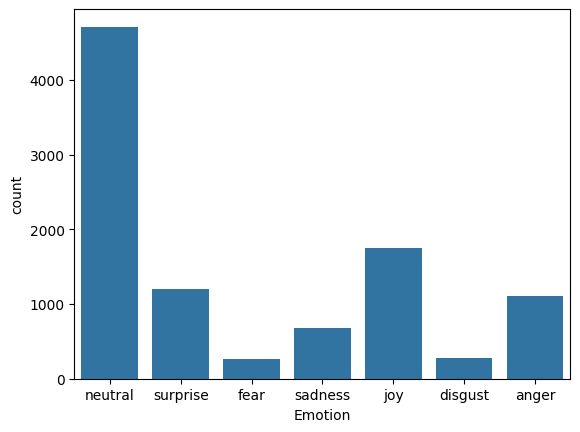

In [23]:
sns.countplot(x=dftrain['Emotion'])

This figure is rather basic. We do not see the totals of each category and need to guess the counts by eye-balling it. We want to get the proportions for these labels.

To add more information to the figure, we will use another package called **matplotlib**. There are many options and functions you can use to modify and adapt plots using **matplotlib**. We will show only a few here. You can read more about setting parameters for plotting figures here: https://matplotlib.org/stable/tutorials/introductory/customizing.html 

Also **matplotlib** should have been installed at the start of the course through the requirements.txt. If not installed, install **matplotlib** in the usual way if you have not done so before. Otherwise, you can skip the next cell.

In [25]:
#%conda install matplotlib==3.10.3

#or

#pip install matplotlib==3.10.3

We import **matplotlib** as 'plt': 

In [26]:
import matplotlib.pyplot as plt

We use the ```Counter``` and ```OrderedDict``` functions to get an alphabetically sorted list of the emotions by frequency:

In [28]:
from collections import Counter, OrderedDict
counts = Counter(dftrain['Emotion'])
counts_sorted = OrderedDict(sorted(counts.items()))
print(counts_sorted)
labels = list(counts_sorted.keys())
values = list(counts_sorted.values())
print(labels, values)

OrderedDict([('anger', 1109), ('disgust', 271), ('fear', 268), ('joy', 1743), ('neutral', 4710), ('sadness', 683), ('surprise', 1205)])
['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise'] [1109, 271, 268, 1743, 4710, 683, 1205]


To make things easier, we define a function called **plot_labels_with_counts** that takes the labels and count values and plots them as bars using **Seaborn**. This will augment the bars with the proportion out of the total.

In [29]:
#### Adding proportions to plotted labels counts
def plot_labels_with_counts(labels, values):
    total = 0
    total = sum(values)
   # print('Total of values', total)
    ax = sns.barplot(x=labels, y=values)
    # Add values above bars
    for i, v in enumerate(values):
        ax.text(i, v + 0.2, str(int((v/total*100)))+'%', ha='center')
    plt.show()

We can now simply call this function to augment the plot with proportion values:

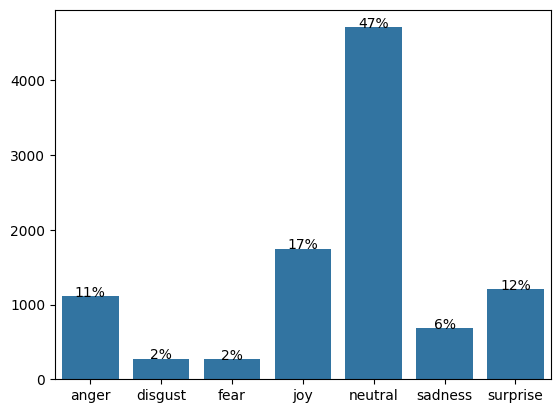

In [30]:
plot_labels_with_counts(labels, values)

Now, we have the proportions on top of the bars. We clearly see that the emotions are not equally distributed over the utterances. Most utterances are `neutral` (47%) and `fear` and `disgust` are rare. It is important to realize this when training and testing the classifier.

On the basis of the stats for the emotion values, we can already have expectations for what a machine will learn from this data: **assign the class neutral!**

A possible majority class baseline could always assign `neutral`. If the label distribution in the test set is the same, it will be correct in 47% of the cases. 

Let us see if the test data has a similar distribution:

OrderedDict([('anger', 345), ('disgust', 68), ('fear', 50), ('joy', 402), ('neutral', 1256), ('sadness', 208), ('surprise', 281)])


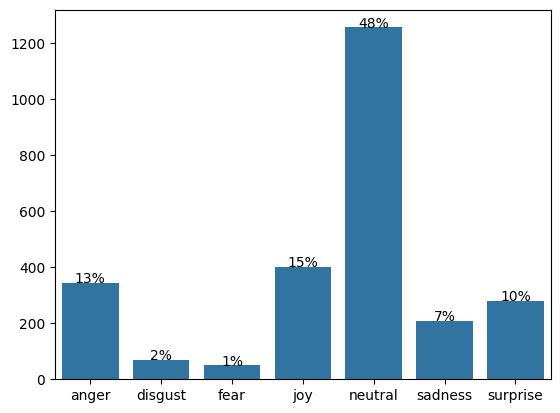

In [32]:
counts = Counter(dftest['Emotion'])
counts_sorted = OrderedDict(sorted(counts.items()))
print(counts_sorted)
labels = list(counts_sorted.keys())
values = list(counts_sorted.values())
plot_labels_with_counts(labels, values)

We see that the test data is similar in terms of the distribution of emotions. This means that statistical expectations learned from the training data will be relevant for the test data. A ```neutral``` baseline always assigns the class neutral and will be correct in 48% of the cases. We want to build a model that performs better than this baseline. Anything performing at this level or lower did not learn much or the wrong things.

# End of this notebook